In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
#Implementamos la estructura de la NN
class NeuralNet(nn.Module):
    def __init__(self, hidden_size, output_size=1,input_size=1):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.LeakyReLU()
        self.l3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        out = self.relu3(out)
        out = self.l4(out)
        return out

### La ecuación diferencial para el decaimiento de partículas se puede describir utilizando la ley de desintegración radiactiva, que establece que la tasa de cambio de la cantidad de material radiactivo en el tiempo es proporcional a la cantidad presente. Esta ecuación se expresa comúnmente como:

### $\frac{dR}{dt} = -\lambda R$ 

### donde R es la cantidad de material radiactivo presente en un momento dado y $\lambda$ es la constante de desintegración, que representa la probabilidad de desintegración por unidad de tiempo.

In [3]:
#Creamos el criterio de la funcion L_Data
criterion = nn.MSELoss()

# Define la funcion de costo y condiciones iniciales
def initial_condition_loss(R, target_value):
    return nn.MSELoss()(R, target_value)

In [4]:
# Vector de tiempo como entrada de la NN
t_numpy = np.arange(0, 5+0.01, 0.01, dtype=np.float32)
t = torch.from_numpy(t_numpy).reshape(len(t_numpy), 1)
t.requires_grad_(True)


k = 1 #esta es la constante Lambda,pero debemos tener cuidado 
      # pues en Python lambda es una palabra reservada para un tipo 
      #especial de funciones

# Iniciamos las neuronas
model = NeuralNet(hidden_size=50)

# Costo y omptimizador
learning_rate = 8e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# epocas
num_epochs = int(5e3)

In [5]:
for epoch in range(num_epochs):

    
    epsilon = torch.normal(0,0.1, size=(len(t),1)).float()
    t_train = t + epsilon

    # Forward pass
    R_pred = model(t_train)

    # Caalcular la derivada del forward pass
    dR_dt = torch.autograd.grad(R_pred, 
                                t_train, 
                                grad_outputs=torch.ones_like(R_pred), 
                                create_graph=True)[0]

    # Funcion física
    loss_DE = criterion(dR_dt + k*R_pred, torch.zeros_like(dR_dt))

    # Condicion inicial 
    loss_IC = initial_condition_loss(model(torch.tensor([[0.0]])), 
                                     torch.tensor([[1.0]]))

    loss = loss_DE + loss_IC

    # Backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

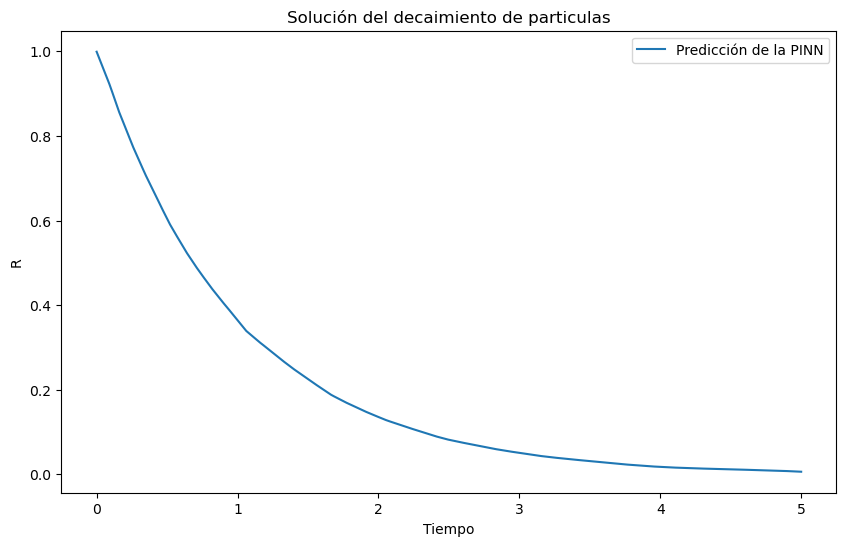

In [6]:
import matplotlib.pyplot as plt

# Genera puntos de tiempo para evaluar la solución
t_test = torch.linspace(0, 5, 500).reshape(-1, 1)

# Evalúa la red neuronal en los puntos de tiempo de prueba
with torch.no_grad():
    R_pred_test = model(t_test)

# Gráfica de la solución predicha por la red neuronal
plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), R_pred_test.numpy(), label='Predicción de la PINN')
plt.xlabel('Tiempo')
plt.ylabel('R')
plt.title('Solución del decaimiento de particulas')
plt.legend()
plt.grid(False)
plt.show()


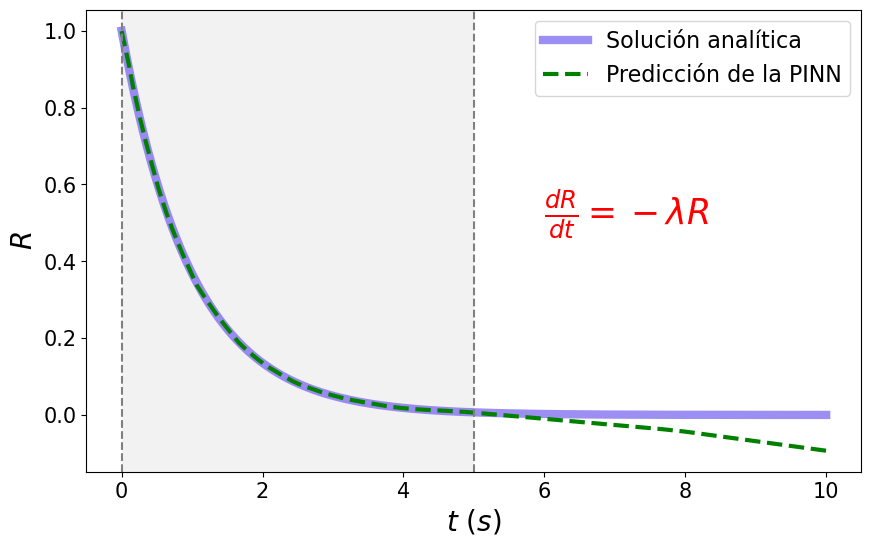

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 1

# Función para la solución analítica
def analytical_solution(t):
    omega = np.exp(-k*t)
    return omega

# Genera puntos de tiempo para evaluar la solución
t_test = torch.linspace(0, 10, 500).reshape(-1, 1)

# Evalúa la red neuronal en los puntos de tiempo de prueba
with torch.no_grad():
    R_pred_test = model(t_test)

# Calcula la solución analítica en los mismos puntos de tiempo
R_analytical = analytical_solution(t_test.numpy())

# Gráfica de la solución predicha por la red neuronal
plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), R_analytical, lw=6, color = 'mediumslateblue', alpha = 0.75, label='Solución analítica')
plt.plot(t_test.numpy(), R_pred_test.numpy(), lw=3, linestyle='--',color='green',label='Predicción de la PINN')
plt.axvline(x=0, color='gray', linestyle='--')  # Línea vertical en t = 0
plt.axvline(x=5, color='gray', linestyle='--')   # Línea vertical en t = 5
plt.text(6, 0.5, r'$\frac{dR}{dt} = -\lambda R$', fontsize=25, color='r')
plt.xlabel('$t~(s)$', fontsize=20)
plt.ylabel('$R$', fontsize=20)
plt.axvspan(0, 5, facecolor='gray', alpha=0.1)
#plt.title('Solución del decaimiento de particulas')
plt.legend(fontsize = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.savefig('DecaimientoFinal.png')
plt.show()


In [51]:
1.802*10**-3==0.001802

True